In [211]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2

Test_path=r'../input/deepfake-detection-challenge/test_videos/'
Train_path=r'../input/deepfake-detection-challenge/train_sample_videos/'
metadata = '../input/deepfake-detection-challenge/train_sample_videos/metadata.json'


In [212]:
test = sorted(glob.glob(Test_path + '*.mp4'))
train=sorted(glob.glob(Train_path + '*.mp4'))
print(' {} samples in the train set.'.format(len(test)))
print(' {} samples in the train set.'.format(len(train)))
        

 400 samples in the train set.
 400 samples in the train set.


In [213]:
test_r=pd.read_json(metadata).transpose()
test_r.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


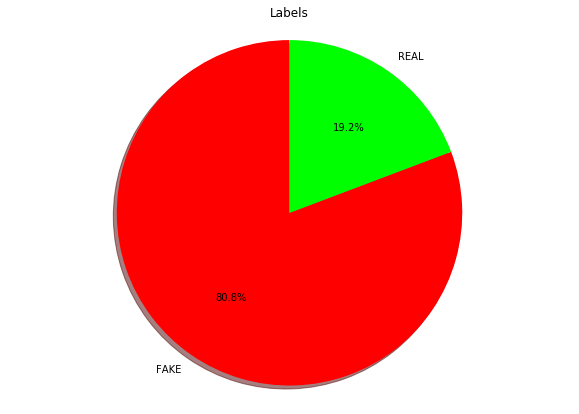

In [214]:
labels='FAKE','REAL'
sizes = [test_r[test_r.label == 'FAKE'].label.count(), test_r[test_r.label == 'REAL'].label.count()]

fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=['#FF0000', '#00FF00'])
ax1.axis('equal') 
plt.title('Labels')

plt.show()

In [215]:
def frame_read(filename):
    cap=cv2.VideoCapture(filename)
    ret,frame=cap.read()
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cap.release()
    cv2.destroyAllWindows()
    return img

def get_label(filename,test_r):
    vi_id= filename.split('/')[-1]
    return test_r.loc[vi_id].label

def get_original_filename(filename, test_r):
    vi_id= filename.split('/')[-1]
    ori_id= test_r.loc[vi_id].original
    return ori_id

def visual_frame(filename,test_r,train=True):
     image = frame_read(filename)
     fig, axs = plt.subplots(1,3, figsize=(20,7))
     axs[0].imshow(image) 
     axs[0].axis('off')
     axs[0].set_title('Original frame')
     face_cascade = cv2.CascadeClassifier('../input/haarcascades/haarcascade_frontalface_default.xml')
     faces = face_cascade.detectMultiScale(image, 2, 3)
     image_with_detections = image.copy()
     for (x,y,w,h) in faces:
            cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3)
            axs[1].imshow(image_with_detections)
            axs[1].axis('off')
            axs[1].set_title('Highlight faces')
            crop_img = image.copy()
            for (x,y,w,h) in faces:
                 crop_img = image[y:y+h, x:x+w]
                 break;
            axs[2].imshow(crop_img)
            axs[2].axis('off')
            axs[2].set_title('Zoom-in face')
            if train:
                  plt.suptitle('Image {image} label: {label}'.format(image = filename.split('/')[-1], label=get_label(filename, test_r)))
            else:
                  plt.suptitle('Image {image}'.format(image = filename.split('/')[-1]))
      

plt.show()



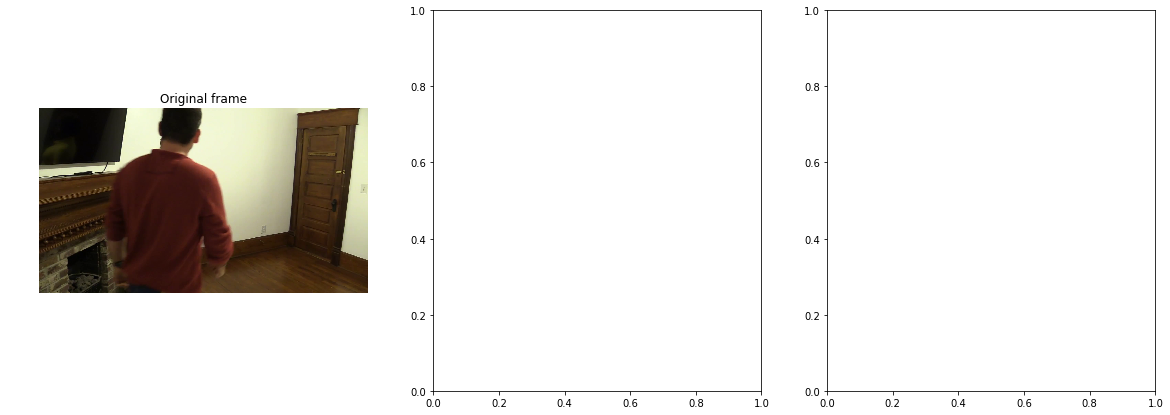

In [216]:
visual_frame(train[200],test_r)